In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

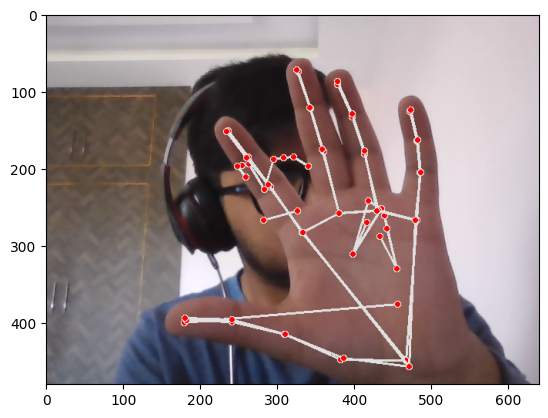

In [7]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extract Keypoint Values

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [11]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
# if results.face_landmarks :
#   print("Yes")
# else :
#   np.zeros(1404)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test


array([ 0.44246808,  0.4733291 , -0.53539175, ...,  0.7395094 ,
        0.25972703, -0.10563378])

In [15]:
np.save('0', result_test)

In [16]:
np.load('0.npy')

array([ 0.44246808,  0.4733291 , -0.53539175, ...,  0.7395094 ,
        0.25972703, -0.10563378])

Setup Folders for Collection

In [17]:
from os import listdir , mkdir
from os.path import isfile, join , isdir
mypath = './SL/'
DATA_PATH = './Dataset/'
folderNames = [f for f in listdir(mypath) if (isdir(join(mypath, f)) )] 
folderPaths = [join(mypath, f) for f in folderNames]  

actions = np.array(folderNames)
no_sequences = 5 
sequence_length = 30
# for i in actions:
#     print(i)


In [18]:
v = [[] for k in range(2000)]
g=0
for i in folderPaths:
    c = 0 
    for f in listdir(i):
        c=c+1
        if(c<=5):
            # print(i,f)
            ph = os.path.join(i,f)
            v[g].append(ph)
    g=g+1        
for i in range(0,2000,1):
    v[i][0] = v[i][0].replace("\\","/")
    v[i][1] = v[i][1].replace("\\","/")
    if(len(v[i])>=3): 
        v[i][2] = v[i][2].replace("\\","/")
    if(len(v[i])>=4):   
        v[i][3] = v[i][3].replace("\\","/")
    if(len(v[i]))==5: 
        v[i][4] = v[i][4].replace("\\","/")      
print(v)
print(v[0])


[['./SL/a/01610.mp4', './SL/a/01611.mp4', './SL/a/01612.mp4', './SL/a/01615.mp4', './SL/a/66039.mp4'], ['./SL/abdomen/00335.mp4', './SL/abdomen/00336.mp4', './SL/abdomen/00338.mp4', './SL/abdomen/00339.mp4', './SL/abdomen/00341.mp4'], ['./SL/able/00376.mp4', './SL/able/00377.mp4', './SL/able/00378.mp4', './SL/able/00381.mp4', './SL/able/00382.mp4'], ['./SL/about/00414.mp4', './SL/about/00415.mp4', './SL/about/00416.mp4', './SL/about/00421.mp4', './SL/about/00426.mp4'], ['./SL/above/00430.mp4', './SL/above/00431.mp4', './SL/above/00433.mp4', './SL/above/00435.mp4', './SL/above/65004.mp4'], ['./SL/accent/00583.mp4', './SL/accent/00584.mp4', './SL/accent/00585.mp4', './SL/accent/00586.mp4', './SL/accent/65006.mp4'], ['./SL/accept/00592.mp4', './SL/accept/00593.mp4', './SL/accept/00594.mp4', './SL/accept/00597.mp4', './SL/accept/00599.mp4'], ['./SL/accident/00623.mp4', './SL/accident/00624.mp4', './SL/accident/00625.mp4', './SL/accident/00626.mp4', './SL/accident/00627.mp4'], ['./SL/accomp

In [19]:
# for i in range(2000):
#     s=0
#     for j in v[i]:
#         print(s)
#         s=s+1

In [20]:
# for action in actions:
#     for sequence in range(no_sequences):
#         try:
#             os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
#         except:
#             pass

Collect Keypoint Values for Training and Testing

In [21]:
# for i in range(2000):
#     sequence=0
#     for j in v[i]:
#         cap = cv2.VideoCapture(j)
#                 # Set mediapipe model 
#         with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#                 # #loop through actions
#                 # for action in actions:
#                 #     #loop through videos
#                 #     for sequence in range(no_sequences):
#                 #         #loop through each videos frame 
                 
#                 for frame_num in range(sequence_length):
#                                         # Read feed
#                         ret, frame = cap.read()

#                         if not ret:
#                               break 

#                                                 # Make detections
#                         image, results = mediapipe_detection(frame, holistic)
                        
#                                                 # Draw landmarks
#                         draw_styled_landmarks(image, results)
                                        
#                         cv2.imshow('OpenCV Feed',image)
#                                                 # Break gracefully
#                         keypoints = extract_keypoints(results)
#                         # npy_path = os.path.join(DATA_PATH, 'a/0', str(frame_num))
                        
#                         npy_path = os.path.join(DATA_PATH, actions[i],str(sequence), str(frame_num))
#                         print(npy_path)      
                        
#                         np.save(npy_path, keypoints)
                                
#                         if cv2.waitKey(10) & 0xFF == ord('q'):
#                                 break 
        
#         sequence=sequence+1
        

    

# cap.release()
# cv2.destroyAllWindows()
            

Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map
print(label_map)

{'a': 0, 'abdomen': 1, 'able': 2, 'about': 3, 'above': 4, 'accent': 5, 'accept': 6, 'accident': 7, 'accomplish': 8, 'accountant': 9, 'across': 10, 'act': 11, 'action': 12, 'active': 13, 'activity': 14, 'actor': 15, 'adapt': 16, 'add': 17, 'address': 18, 'adjective': 19, 'adjust': 20, 'admire': 21, 'admit': 22, 'adopt': 23, 'adult': 24, 'advanced': 25, 'advantage': 26, 'adverb': 27, 'affect': 28, 'afraid': 29, 'africa': 30, 'after': 31, 'afternoon': 32, 'again': 33, 'against': 34, 'age': 35, 'agenda': 36, 'ago': 37, 'agree': 38, 'agreement': 39, 'ahead': 40, 'aid': 41, 'aim': 42, 'airplane': 43, 'alarm': 44, 'alcohol': 45, 'algebra': 46, 'all': 47, 'allergy': 48, 'alligator': 49, 'allow': 50, 'all_day': 51, 'almost': 52, 'alone': 53, 'alphabet': 54, 'already': 55, 'also': 56, 'always': 57, 'amazing': 58, 'america': 59, 'amputate': 60, 'analyze': 61, 'anatomy': 62, 'and': 63, 'angel': 64, 'angle': 65, 'angry': 66, 'animal': 67, 'anniversary': 68, 'announce': 69, 'annoy': 70, 'another': 7

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                # print(res.shape)
                window.append(res)
            except FileNotFoundError:
                window.append([0]*1662)
                # print(window[frame_num])
                print(f"File not found for frame {action} , {sequence} ,{frame_num}")
        sequences.append(window)
        labels.append(label_map[action])
        

File not found for frame accept , 1 ,28
File not found for frame accept , 1 ,29
File not found for frame adapt , 2 ,29
File not found for frame adopt , 2 ,29
File not found for frame advanced , 4 ,0
File not found for frame advanced , 4 ,1
File not found for frame advanced , 4 ,2
File not found for frame advanced , 4 ,3
File not found for frame advanced , 4 ,4
File not found for frame advanced , 4 ,5
File not found for frame advanced , 4 ,6
File not found for frame advanced , 4 ,7
File not found for frame advanced , 4 ,8
File not found for frame advanced , 4 ,9
File not found for frame advanced , 4 ,10
File not found for frame advanced , 4 ,11
File not found for frame advanced , 4 ,12
File not found for frame advanced , 4 ,13
File not found for frame advanced , 4 ,14
File not found for frame advanced , 4 ,15
File not found for frame advanced , 4 ,16
File not found for frame advanced , 4 ,17
File not found for frame advanced , 4 ,18
File not found for frame advanced , 4 ,19
File not fou

In [26]:
import csv 
# with open('labels.csv', 'w', newline='') as file:
#     # Create a CSV writer object
#     writer = csv.writer(file)
    
#     # Write each row to the file
#     for label in labels:
#         writer.writerow(label)
with open('sequences.csv', 'w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)
    
    # Write each row to the file
    for sequence in sequences:
        writer.writerow(sequence)

In [27]:
np.array(sequences).shape
# print(sequences[37][29])

(10000, 30, 1662)

In [28]:
np.array(labels).shape

(10000,)

In [29]:
X = np.array(sequences)
X.shape

(10000, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(500, 2000)

In [33]:
# import tensorflow as tf
# my_tensor = tf.convert_to_tensor(sequences)

Build and Train LSTM Neural Network

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard


In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
297/297 [==============================] - 27s 90ms/step - loss: 7.6013 - accuracy: 1.0526e-04
Epoch 2/100
297/297 [==============================] - 27s 91ms/step - loss: 7.6012 - accuracy: 0.0000e+00
Epoch 3/100
297/297 [==============================] - 27s 92ms/step - loss: 7.6010 - accuracy: 1.0526e-04
Epoch 4/100
297/297 [==============================] - 27s 92ms/step - loss: 7.6008 - accuracy: 0.0000e+00
Epoch 5/100
297/297 [==============================] - 27s 92ms/step - loss: 7.6006 - accuracy: 1.0526e-04
Epoch 6/100
297/297 [==============================] - 27s 92ms/step - loss: 7.6005 - accuracy: 0.0000e+00
Epoch 7/100
297/297 [==============================] - 27s 92ms/step - loss: 7.6003 - accuracy: 0.0000e+00
Epoch 8/100
297/297 [==============================] - 27s 92ms/step - loss: 7.6002 - accuracy: 2.1053e-04
Epoch 9/100
297/297 [==============================] - 27s 92ms/step - loss: 7.6001 - accuracy: 0.0000e+00
Epoch 10/100
297/297 [===============

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2000)              66000     
                                                                 
Total params: 662,576
Trainable params: 662,576
Non-trai

Make Predictions

In [42]:
res = model.predict(X_test)

16/16 [==============================] - 1s 48ms/step


In [53]:
actions[np.argmax(res[0])]

'objective'

In [52]:
actions[np.argmax(y_test[0])]

'than'

In [54]:
model.save('action.h5')